# Prédiction d'un bon ou mauvais client : scoring en Banque

 
 ![Inclusion financière](https://ekonomia.fr/wp-content/uploads/2009/11/credit-scoring-1-1.jpg)
 
 
 
 #### Objetif du projet
 Il s'agit de mettre en place une solution de scoring utilisant des algorithmes de machine learning pour assister les chargés de relation client dans leur prise de décision. Cette solution évalue la probabilité qu'un client soit éligible à un prêt bancaire ou non.
 
 #### Sommaire 
 Dans ce notebook, nous allons suivre  les étapes suivantes:
 
 1. [Lecture de la base de donnée](#1.-Lecture-de-la-base-de-donnée)
 2. [Exploration des données](#2.-Exploration-des-données)
 3. [Prétraitement des données](#3.-Prétraitement-des-données)
 4. [Modélisation et Prediction](#4.-Modélisation-et-Prediction)
 5. [Optimisation des performances: Réglage des hyperparamètres](#5.-Optimisation-des-performances:-Réglage-des-hyperparamètres)
 
 ### Description des  variables de notre base de données
 | Variable             | Description                                           |
|----------------------|-------------------------------------------------------|
| ident                | Identifiant unique pour chaque observation.           |
| type_client          | Type de client.                                       |
| tranche_age          | Tranche d'âge de chaque individu.                    |
| statut_matrimonial   | Statut matrimonial de chaque individu.               |
| anciennete           | Ancienneté du client.                                 |
| tranche_epargne      | Tranche d'épargne de chaque individu.                |
| profession           | Profession de chaque individu.                        |
| cumul_credit         | Cumul du crédit de chaque individu.                  |
| salaire              | Salaire de chaque individu (en unités monétaires).   |
| credit_demande       | Montant du crédit demandé par chaque individu.       |


 

In [43]:
## Instalation de package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
%matplotlib inline

### 1. Lecture de la base de donnée

In [44]:
##Lecture de la base de données

data1= pd.read_csv("./base.csv",sep=";")
#data1 = pd.read_csv('base.csv', delimiter=';')
data1.head()

,ident,type_client,tranche_age,statut_matrimonial,anciennete,tranche_epargne,profession,cumul_credit,salaire,credit_demande
0,I001,bon client,plus de 50 ans,celibataire,anc. plus 12 ans,pas d'epargne,employe,de 40 a 100 debits,765,700
1,I002,bon client,moins de 23 ans,celibataire,anc. 1 an ou moins,pas d'epargne,employe,moins de 40 debits,465,465
2,I003,mauvais client,de 23 a 40 ans,veuf,anc. de 6 a 12 ans,pas d'epargne,employe,de 40 a 100 debits,680,555
3,I004,bon client,de 23 a 40 ans,divorce,anc. de 1 a 4 ans,moins de 10KF epargn,employe,de 40 a 100 debits,560,640
4,I005,bon client,moins de 23 ans,celibataire,anc. de 6 a 12 ans,pas d'epargne,employe,moins de 40 debits,575,570


### 2. Exploration des données

In [45]:
print("Dimension de la base de données", data1.shape,"\n")

Dimension de la base de données (468, 10) 



In [46]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ident               468 non-null    object
 1   type_client         468 non-null    object
 2   tranche_age         468 non-null    object
 3   statut_matrimonial  468 non-null    object
 4   anciennete          468 non-null    object
 5   tranche_epargne     468 non-null    object
 6   profession          468 non-null    object
 7   cumul_credit        468 non-null    object
 8   salaire             468 non-null    int64 
 9   credit_demande      468 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 36.7+ KB
None


In [47]:
##Afficharge des variables de la base de données
print("Variables de la base de données:\n", "\n",   data1.columns )

Variables de la base de données:
 
 Index(['ident', 'type_client', 'tranche_age', 'statut_matrimonial',
       'anciennete', 'tranche_epargne', 'profession', 'cumul_credit',
       'salaire', 'credit_demande'],
      dtype='object')


In [48]:
##Les différents types de variables
data1.dtypes

ident                 object
type_client           object
tranche_age           object
statut_matrimonial    object
anciennete            object
tranche_epargne       object
profession            object
cumul_credit          object
salaire                int64
credit_demande         int64
dtype: object

In [49]:
data1.describe()

,salaire,credit_demande
count,468.000000,468.000000
mean,554.177350,513.408120
std,185.933367,169.463437
min,110.000000,50.000000
25%,403.750000,395.000000
50%,570.000000,500.000000
75%,690.000000,650.000000
max,945.000000,960.000000


- Affichage des modalités qualitatives

In [50]:
##Ce code parcourt toutes les colonnes de type "object" dans le  DataFrame dataset, 
# puis pour chaque colonne, il affiche son nom suivi de ses valeurs uniques. 
base=data1.copy()
base2=base.drop("ident",axis=1)
for col in base2.select_dtypes('object'):
     print(f'{col:-<60}{data1[col].unique()}')

type_client-------------------------------------------------['bon client' 'mauvais client']
tranche_age-------------------------------------------------['plus de 50 ans' 'moins de 23 ans' 'de 23 a 40 ans' 'de 40 a 50 ans']
statut_matrimonial------------------------------------------['celibataire' 'veuf' 'divorce' 'marie']
anciennete--------------------------------------------------['anc. plus   12 ans' 'anc. 1 an  ou moins' 'anc. de 6  a 12 ans'
 'anc. de 1  a 4 ans' 'anc. de 4  a 6 ans']
tranche_epargne---------------------------------------------["pas d'epargne" 'moins de 10KF epargn' 'de 10 a 100KF epargn'
 'plus de 100KF epargn']
profession--------------------------------------------------['employe' 'cadre' 'autre']
cumul_credit------------------------------------------------['de 40 a 100  debits' 'moins de 40  debits' 'plus de 100  debits']


- Effectifs et pourcentage des modalités de chaque variables qualitatives

In [51]:

# Boucle à travers toutes les colonnes qualitatives
dataset1=data1.copy()
dataset1=dataset1.drop("ident", axis=1)
for col in dataset1.select_dtypes('object'):
    # Calculer les effectifs de chaque modalité
    value_counts = dataset1[col].value_counts()
    
    # Calcul du nombre total d'observations dans la colonne
    total_observations = value_counts.sum()
    
    # Calcul des pourcentages de chaque modalité
    percentages = (value_counts / total_observations) * 100
    
    # Créeation d'un DataFrame pour stocker les effectifs et les pourcentages
    df_stats = pd.DataFrame({'Effectif': value_counts, 'Pourcentage (%)': percentages})
    # Affichage du nom de la colonne et ses valeurs uniques
    print(f'{col:-<60}')
    print(df_stats)
    print('\n')


type_client-------------------------------------------------
                Effectif  Pourcentage (%)
bon client           237        50.641026
mauvais client       231        49.358974


tranche_age-------------------------------------------------
                 Effectif  Pourcentage (%)
de 23 a 40 ans        150        32.051282
de 40 a 50 ans        122        26.068376
plus de 50 ans        108        23.076923
moins de 23 ans        88        18.803419


statut_matrimonial------------------------------------------
             Effectif  Pourcentage (%)
marie             221        47.222222
celibataire       170        36.324786
divorce            61        13.034188
veuf               16         3.418803


anciennete--------------------------------------------------
                     Effectif  Pourcentage (%)
anc. 1 an  ou moins       199        42.521368
anc. plus   12 ans         87        18.589744
anc. de 4  a 6 ans         69        14.743590
anc. de 6  a 12 ans       

In [52]:
# Visualisation de la base
#data1['type_client'] = data1['type_client'].astype('category')
#data1['type_client'] = data1['type_client'].cat.rename_categories({'bon client': 'Bon client', 'mauvais    client': 'Mauvais client'})
#print(data1['type_client'].value_counts(normalize=True))

- Diagramme en bâton de toutes les variables qualitatives

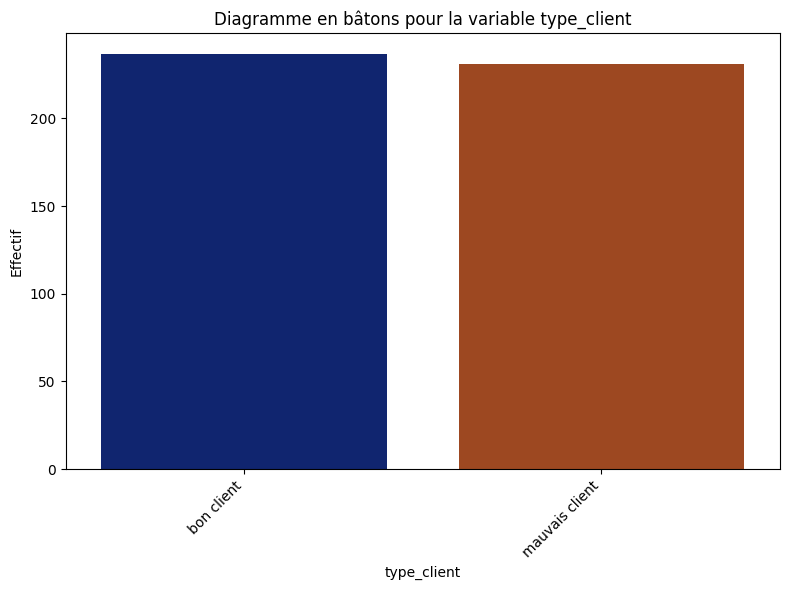

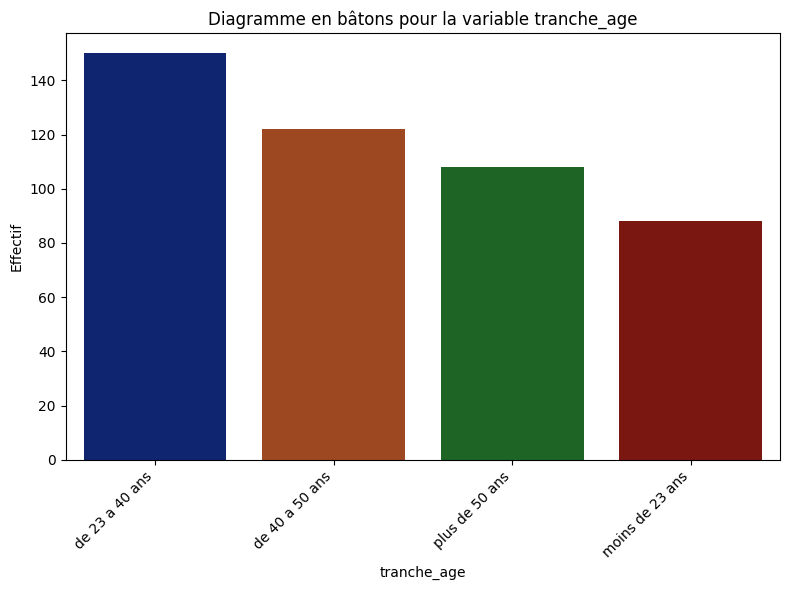

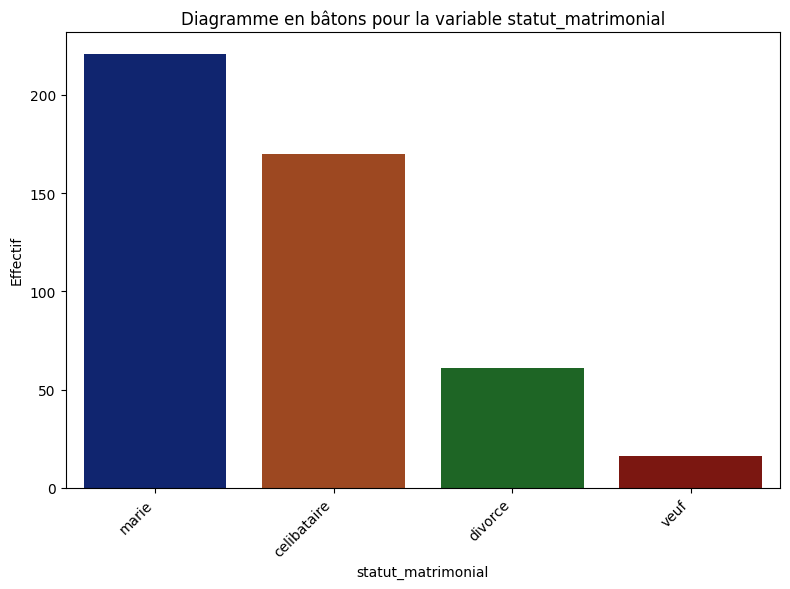

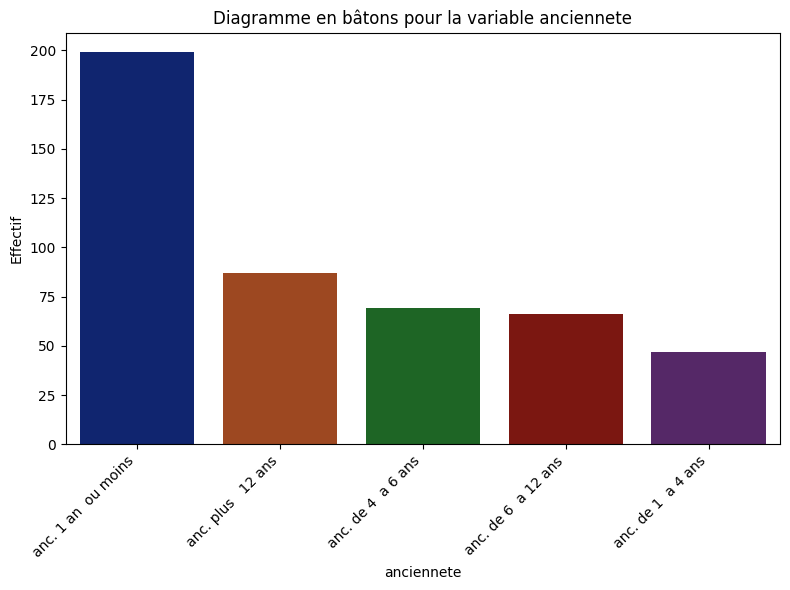

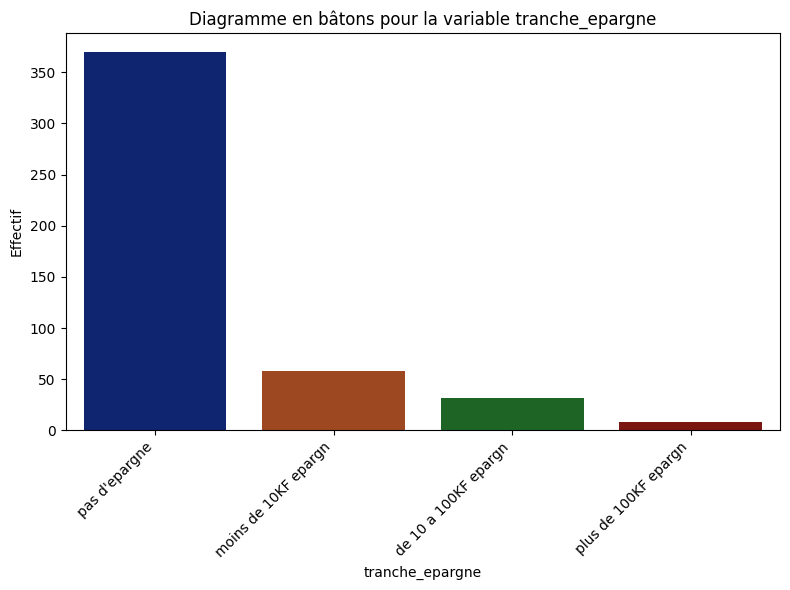

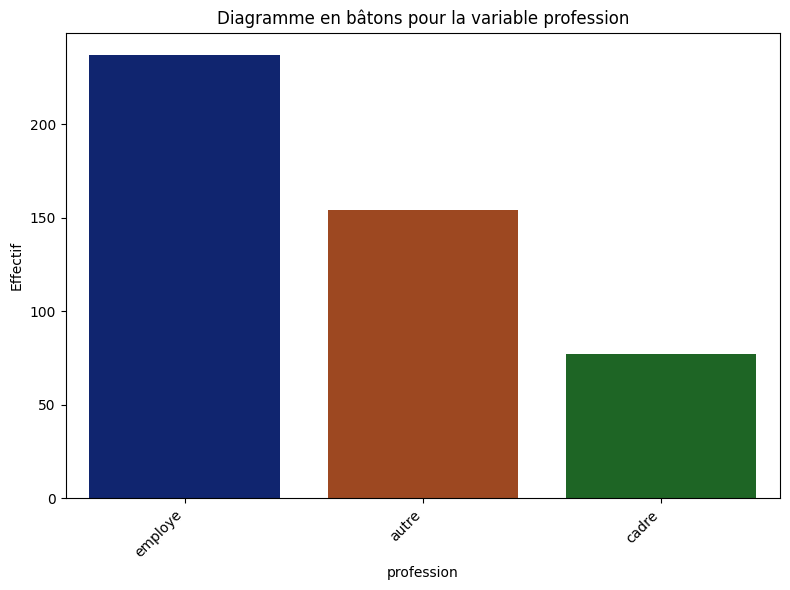

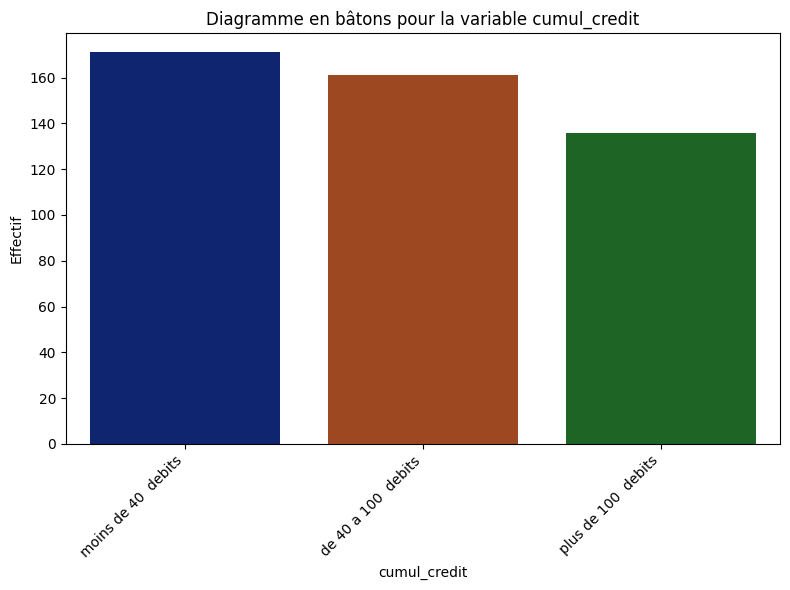

In [53]:
# Liste des variables qualitatives sauf 'uniqueid'
qualitative_variables = [col for col in data1.select_dtypes(include=['object']) if col != 'ident']

# Parcour de chaque variable qualitative
for variable_qualitative in qualitative_variables:
    # Calcul des effectifs de chaque modalité
    value_counts = data1[variable_qualitative].value_counts()

    # Création du diagramme en bâtons
    plt.figure(figsize=(8, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='dark')

    # Ajout des titres et des étiquettes
    plt.title(f'Diagramme en bâtons pour la variable {variable_qualitative}')
    plt.xlabel(variable_qualitative)
    plt.ylabel('Effectif')

    # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
    plt.xticks(rotation=45, ha='right')

    # Affichage du diagramme
    plt.tight_layout()
    plt.show()


- Hitogramme du salaire des clients

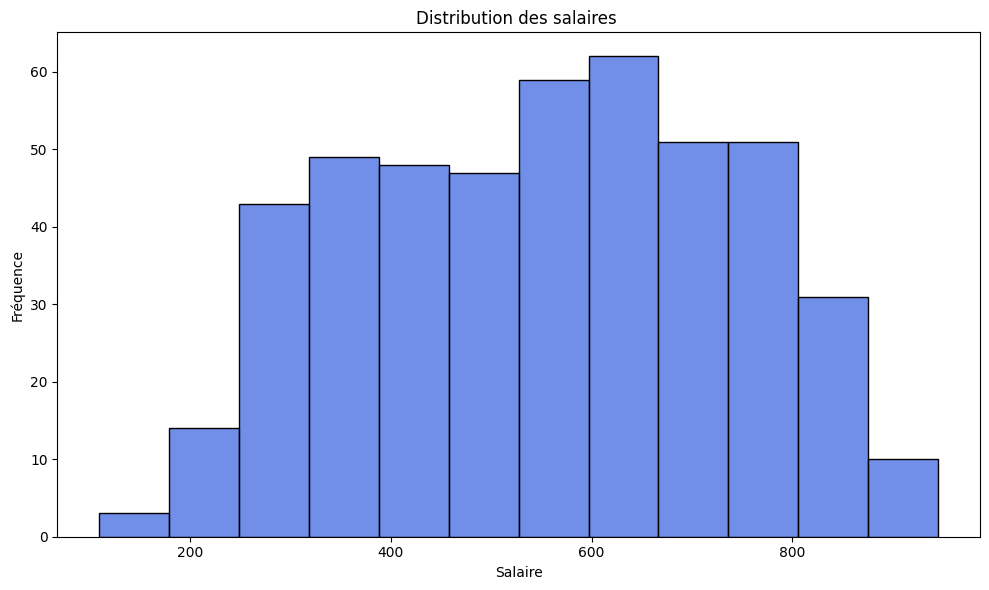

In [54]:
#sns.histplot(data1, x='salaire', color='royalblue')
#plt.show()

plt.figure(figsize=(10, 6))  # Taille de la figure (largeur, hauteur)
sns.histplot(data1, x='salaire', color='royalblue')

# Ajout des titres et des étiquettes
plt.title('Distribution des salaires ')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.tight_layout()
plt.show()

-  Distribution des salaires des clients  en fonction  de la tranche d'âge

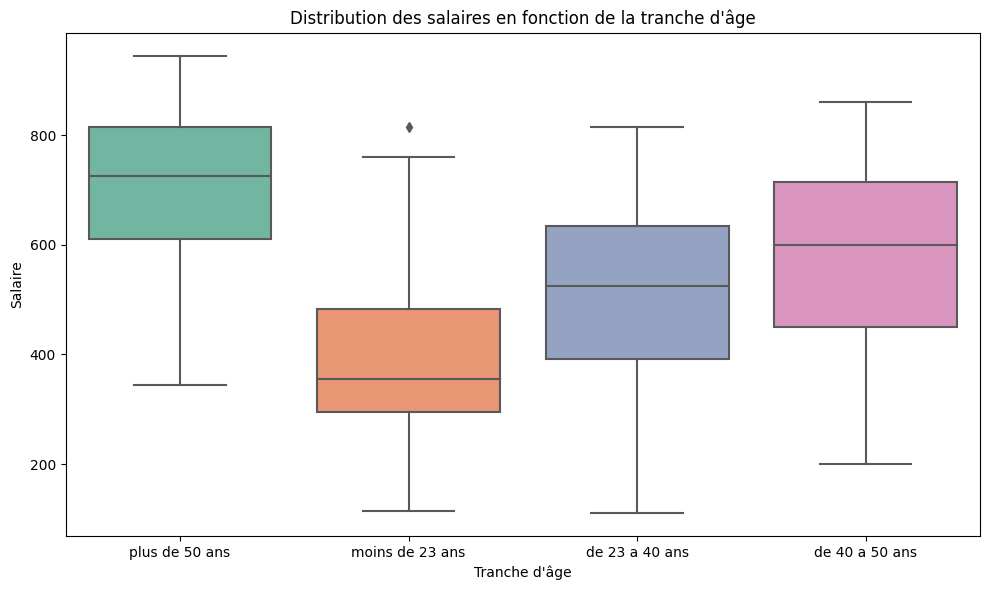

In [55]:

# Choix des variables 
variable_qualitative = 'tranche_age'
variable_numeric = 'salaire'

# Création du diagramme boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=variable_qualitative, y=variable_numeric, data=base, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Distribution des salaires en fonction de la tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Salaire')

# Affichage du graphique
plt.tight_layout()
plt.show()

In [56]:
#sns.histplot(data1, x='salaire', hue='tranche_age', multiple='stack')
#plt.show()

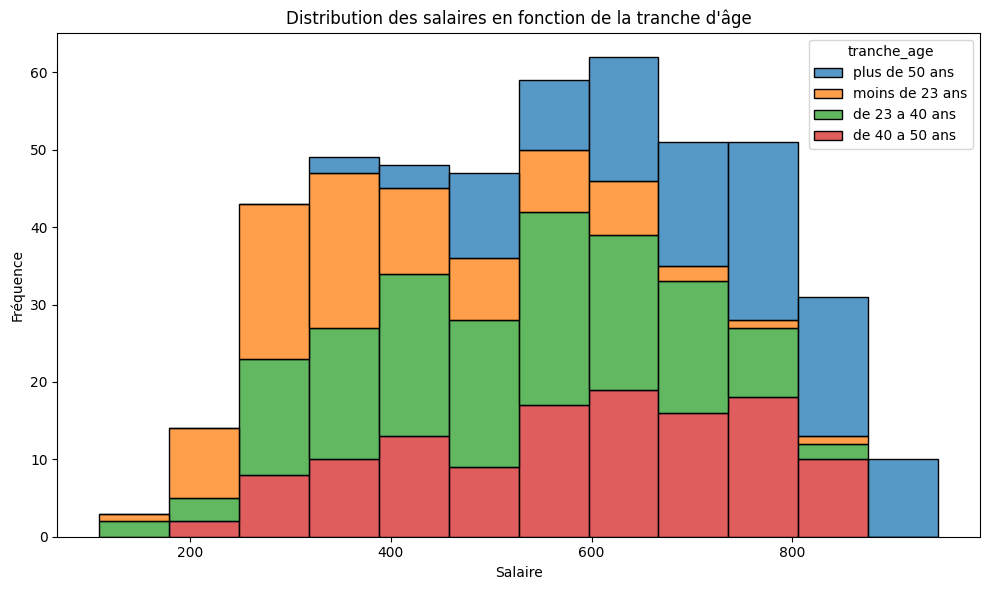

In [57]:
plt.figure(figsize=(10, 6))  # Taille de la figure (largeur, hauteur)
sns.histplot(data1, x='salaire', hue='tranche_age', multiple='stack')

# Ajout des titres et des étiquettes
plt.title('Distribution des salaires en fonction de la tranche d\'âge')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.tight_layout()
plt.show()

- Distribution des salaires  en fonction  du type de clients

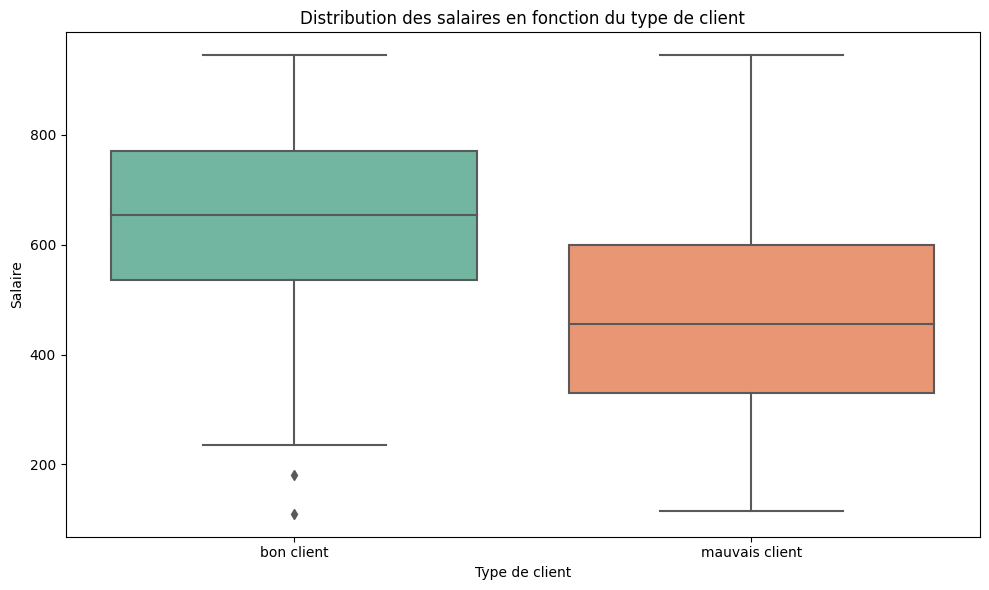

In [58]:

# Choix des variables 
variable_qualitative = 'type_client'
variable_numeric = 'salaire'

# Création du diagramme boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=variable_qualitative, y=variable_numeric, data=base, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Distribution des salaires en fonction du type de client')
plt.xlabel('Type de client')
plt.ylabel('Salaire')

# Affichage du graphique
plt.tight_layout()
plt.show()

- Distribution des crédits demandés en fonction  du type de clients

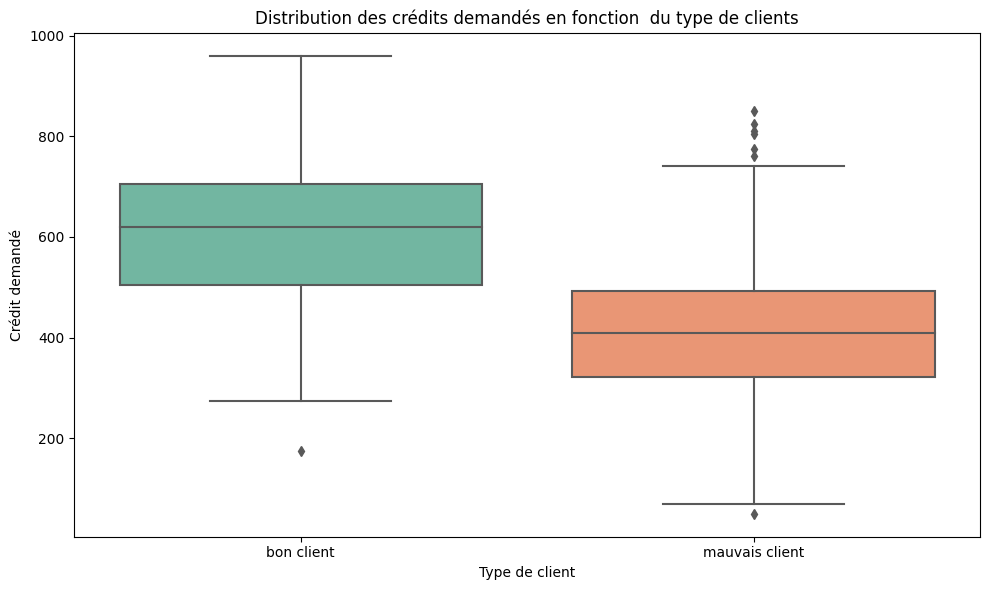

In [59]:

# Choix des variables 
variable_qualitative = 'type_client'
variable_numeric = 'credit_demande'

# Création du diagramme boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=variable_qualitative, y=variable_numeric, data=base, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Distribution des crédits demandés en fonction  du type de clients')
plt.xlabel('Type de client')
plt.ylabel('Crédit demandé')

# Affichage du graphique
plt.tight_layout()
plt.show()

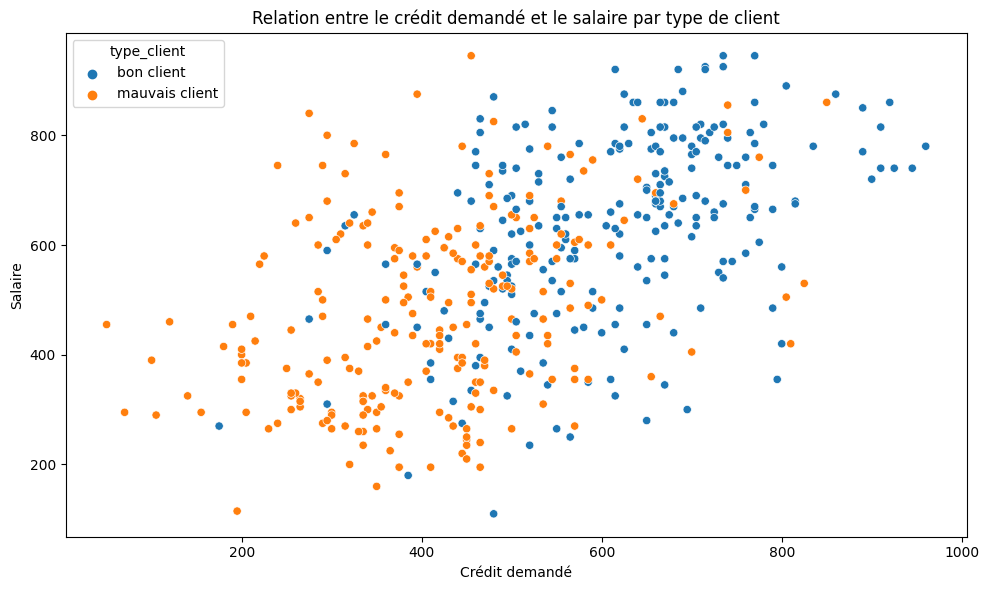

In [60]:

#sns.scatterplot(data=data1, x='credit_demande', y='salaire', hue='type_client')
#plt.show()

plt.figure(figsize=(10, 6))  # Taille de la figure (largeur, hauteur)
sns.scatterplot(data=data1, x='credit_demande', y='salaire', hue='type_client')

# Ajout des titres et des étiquettes
plt.title('Relation entre le crédit demandé et le salaire par type de client')
plt.xlabel('Crédit demandé')
plt.ylabel('Salaire')

# Affichage du graphique
plt.tight_layout()
plt.show()



In [61]:
data1.columns

Index(['ident', 'type_client', 'tranche_age', 'statut_matrimonial',
       'anciennete', 'tranche_epargne', 'profession', 'cumul_credit',
       'salaire', 'credit_demande'],
      dtype='object')

- le type de clients en fonction de son statut matrimonial

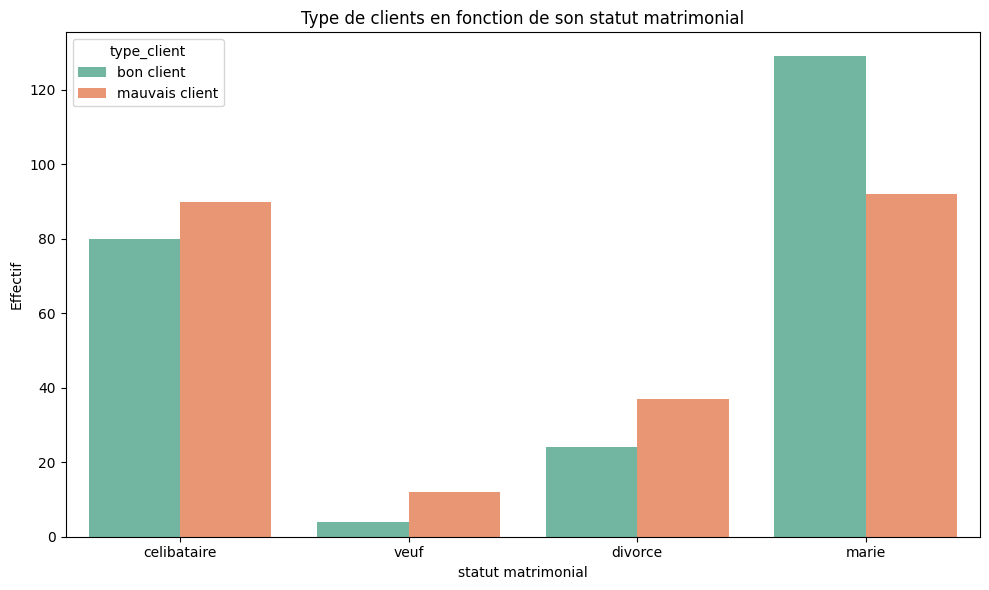

In [62]:
# Choix des variables 
variable_qualitative1 = 'type_client'
variable_qualitative2 = 'statut_matrimonial'

# Création dudiagramme à barres empilées
plt.figure(figsize=(10, 6))
sns.countplot(x=variable_qualitative2, hue=variable_qualitative1, data=data1, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Type de clients en fonction de son statut matrimonial')
plt.xlabel('statut matrimonial')
plt.ylabel('Effectif')

# Affichage du graphique
plt.legend(title=variable_qualitative)
plt.tight_layout()
plt.show()


- le type de client en fonction des tranches d'âge

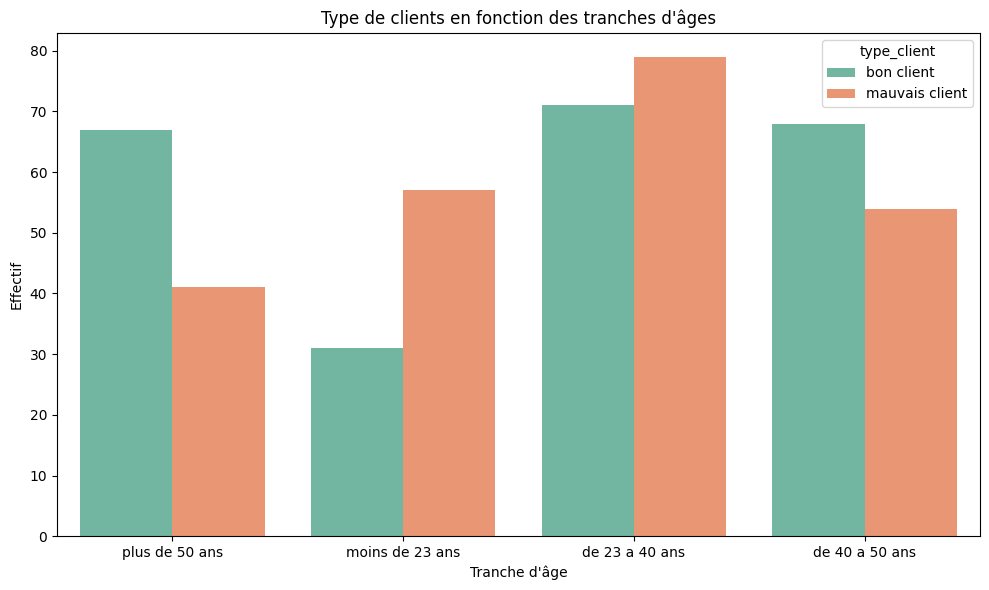

In [63]:
# Choix des variables 
variable_qualitative1 = 'type_client'
variable_qualitative2 = 'tranche_age'

# Création dudiagramme à barres empilées
plt.figure(figsize=(10, 6))
sns.countplot(x=variable_qualitative2, hue=variable_qualitative1, data=data1, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Type de clients en fonction des tranches d\'âges')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Effectif')

# Affichage du graphique
plt.legend(title=variable_qualitative)
plt.tight_layout()
plt.show()


- le type de client en fonction de la profession

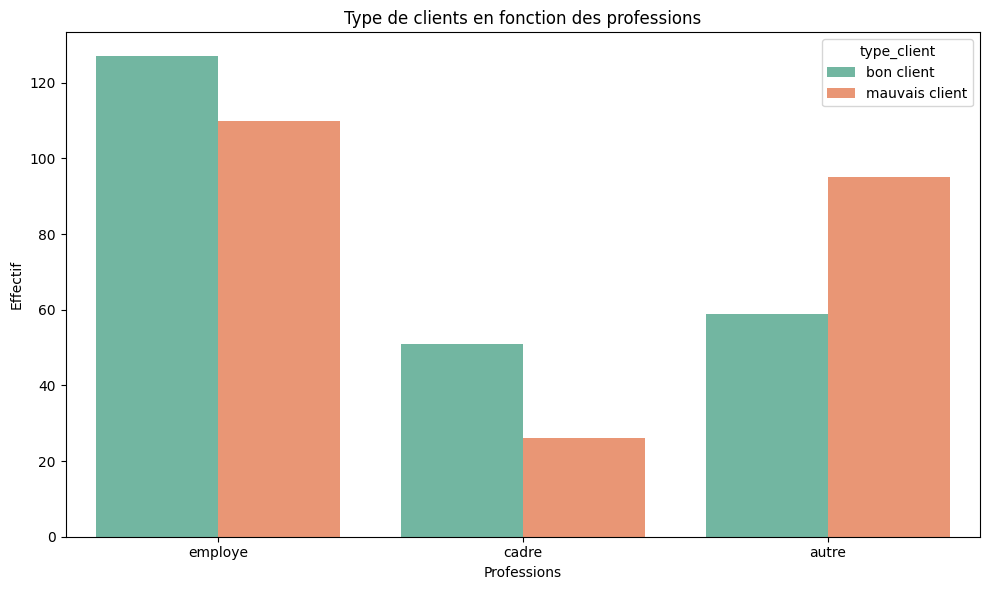

In [64]:
# Choix des variables 
variable_qualitative1 = 'type_client'
variable_qualitative2 = 'profession'

# Création dudiagramme à barres empilées
plt.figure(figsize=(10, 6))
sns.countplot(x=variable_qualitative2, hue=variable_qualitative1, data=data1, palette='Set2')

# Ajout des titres et des étiquettes
plt.title('Type de clients en fonction des professions')
plt.xlabel('Professions')
plt.ylabel('Effectif')

# Affichage du graphique
plt.legend(title=variable_qualitative)
plt.tight_layout()
plt.show()


### 3. Prétraitement des données

In [65]:
##Afficharge des données manquantes
print("Données manquantes par variable: \n", data1.isnull().sum())
#print("Données manquantes par variable: \n", data1.isna().sum())

print("\n")
##Afficharge des données dupliquées
print("Données dupliquées: \n", data1.duplicated().sum())

Données manquantes par variable: 
 ident                 0
type_client           0
tranche_age           0
statut_matrimonial    0
anciennete            0
tranche_epargne       0
profession            0
cumul_credit          0
salaire               0
credit_demande        0
dtype: int64


Données dupliquées: 
 0


In [66]:
data1.head()

,ident,type_client,tranche_age,statut_matrimonial,anciennete,tranche_epargne,profession,cumul_credit,salaire,credit_demande
0,I001,bon client,plus de 50 ans,celibataire,anc. plus 12 ans,pas d'epargne,employe,de 40 a 100 debits,765,700
1,I002,bon client,moins de 23 ans,celibataire,anc. 1 an ou moins,pas d'epargne,employe,moins de 40 debits,465,465
2,I003,mauvais client,de 23 a 40 ans,veuf,anc. de 6 a 12 ans,pas d'epargne,employe,de 40 a 100 debits,680,555
3,I004,bon client,de 23 a 40 ans,divorce,anc. de 1 a 4 ans,moins de 10KF epargn,employe,de 40 a 100 debits,560,640
4,I005,bon client,moins de 23 ans,celibataire,anc. de 6 a 12 ans,pas d'epargne,employe,moins de 40 debits,575,570


In [67]:
data2=data1.copy()
data2=data2.drop("ident",axis=1)

In [68]:
##Sélection des variables qualitatives
data2.select_dtypes(include=['object']).columns

Index(['type_client', 'tranche_age', 'statut_matrimonial', 'anciennete',
       'tranche_epargne', 'profession', 'cumul_credit'],
      dtype='object')

In [69]:
data2['cumul_credit'].unique()

array(['de 40 a 100  debits', 'moins de 40  debits',
       'plus de 100  debits'], dtype=object)

In [70]:
##Recodage de la variable qualitative type_client
data2['type_client']=data2['type_client'].replace(['bon client', 'mauvais client'],[1,0])
#data2['type_client'] = data2['type_client'].map({'Bon client': 0, 'Mauvais client': 1})


In [71]:
data2.head()

,type_client,tranche_age,statut_matrimonial,anciennete,tranche_epargne,profession,cumul_credit,salaire,credit_demande
0,1,plus de 50 ans,celibataire,anc. plus 12 ans,pas d'epargne,employe,de 40 a 100 debits,765,700
1,1,moins de 23 ans,celibataire,anc. 1 an ou moins,pas d'epargne,employe,moins de 40 debits,465,465
2,0,de 23 a 40 ans,veuf,anc. de 6 a 12 ans,pas d'epargne,employe,de 40 a 100 debits,680,555
3,1,de 23 a 40 ans,divorce,anc. de 1 a 4 ans,moins de 10KF epargn,employe,de 40 a 100 debits,560,640
4,1,moins de 23 ans,celibataire,anc. de 6 a 12 ans,pas d'epargne,employe,moins de 40 debits,575,570


- Utilisation de la méthode **pd.get_dummies()**  pour créer des variables indicatrices (dummy variables) à partir des autres variables catégorielles dans le DataFrame.

In [72]:
base = pd.get_dummies(data2)
base.head()

,type_client,salaire,credit_demande,tranche_age_de 23 a 40 ans,tranche_age_de 40 a 50 ans,tranche_age_moins de 23 ans,tranche_age_plus de 50 ans,statut_matrimonial_celibataire,statut_matrimonial_divorce,statut_matrimonial_marie,...,tranche_epargne_de 10 a 100KF epargn,tranche_epargne_moins de 10KF epargn,tranche_epargne_pas d'epargne,tranche_epargne_plus de 100KF epargn,profession_autre,profession_cadre,profession_employe,cumul_credit_de 40 a 100 debits,cumul_credit_moins de 40 debits,cumul_credit_plus de 100 debits
0,1,765,700,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,465,465,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,680,555,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,1,560,640,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
4,1,575,570,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [73]:
feature_columns=base.drop('type_client', axis=1).columns
feature_columns

Index(['salaire', 'credit_demande', 'tranche_age_de 23 a 40 ans',
       'tranche_age_de 40 a 50 ans', 'tranche_age_moins de 23 ans',
       'tranche_age_plus de 50 ans', 'statut_matrimonial_celibataire',
       'statut_matrimonial_divorce', 'statut_matrimonial_marie',
       'statut_matrimonial_veuf', 'anciennete_anc. 1 an  ou moins',
       'anciennete_anc. de 1  a 4 ans', 'anciennete_anc. de 4  a 6 ans',
       'anciennete_anc. de 6  a 12 ans', 'anciennete_anc. plus   12 ans',
       'tranche_epargne_de 10 a 100KF epargn',
       'tranche_epargne_moins de 10KF epargn', 'tranche_epargne_pas d'epargne',
       'tranche_epargne_plus de 100KF epargn', 'profession_autre',
       'profession_cadre', 'profession_employe',
       'cumul_credit_de 40 a 100  debits', 'cumul_credit_moins de 40  debits',
       'cumul_credit_plus de 100  debits'],
      dtype='object')

In [74]:
pd.read_csv("./data_processing_scoring.csv")

,type_client,salaire,credit_demande,tranche_age_de 23 a 40 ans,tranche_age_de 40 a 50 ans,tranche_age_moins de 23 ans,tranche_age_plus de 50 ans,statut_matrimonial_celibataire,statut_matrimonial_divorce,statut_matrimonial_marie,...,tranche_epargne_de 10 a 100KF epargn,tranche_epargne_moins de 10KF epargn,tranche_epargne_pas d'epargne,tranche_epargne_plus de 100KF epargn,profession_autre,profession_cadre,profession_employe,cumul_credit_de 40 a 100 debits,cumul_credit_moins de 40 debits,cumul_credit_plus de 100 debits
0,1,765,700,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,465,465,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,680,555,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,1,560,640,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
4,1,575,570,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0,330,370,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
464,0,765,360,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
465,0,945,455,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
466,0,830,645,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1


In [75]:
## Séparation de la varible à expliquer (target) et les variables explicatives(features)
y= base["type_client"]
X = base.drop("type_client", axis=1)

In [76]:
X.head()

,salaire,credit_demande,tranche_age_de 23 a 40 ans,tranche_age_de 40 a 50 ans,tranche_age_moins de 23 ans,tranche_age_plus de 50 ans,statut_matrimonial_celibataire,statut_matrimonial_divorce,statut_matrimonial_marie,statut_matrimonial_veuf,...,tranche_epargne_de 10 a 100KF epargn,tranche_epargne_moins de 10KF epargn,tranche_epargne_pas d'epargne,tranche_epargne_plus de 100KF epargn,profession_autre,profession_cadre,profession_employe,cumul_credit_de 40 a 100 debits,cumul_credit_moins de 40 debits,cumul_credit_plus de 100 debits
0,765,700,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,465,465,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,680,555,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,560,640,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,575,570,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [77]:
## Division en données d'apprentissage et données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=100)

In [78]:
print(' X_train:', X_train.shape)
print(' y_train:', y_train.shape)
print(' X_test:', X_test.shape)
print(' y_test:', y_test.shape)

 X_train: (327, 25)
 y_train: (327,)
 X_test: (141, 25)
 y_test: (141,)


In [79]:
##Normalisation des variables numériques
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler ()
var=['salaire', 'credit_demande']
X_train[var]= scaler.fit_transform(X_train[var])
X_test[var]= scaler.transform(X_test[var])

### 4. Modélisation et Prediction
 

#### Régression Logistique

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Création d'une instance du modèle de régression linéaire
log_reg= LogisticRegression()
# Entraînement du modèle sur les données d'entraînement
log_reg.fit(X_train,y_train)

LogisticRegression()

- Sauvegarde du modèle : 1ère méthode

In [81]:
import joblib
joblib.dump(log_reg,"model_regLogi.pkl")

['model_regLogi.pkl']

- Sauvegarde du modèle : 2 éme méthode

In [81]:
import pickle
with open("model_regLogi.pkl", "wb") as file:
    pickle.dump(log_reg, file)


- Sauvegarde des colonnes de caractéristiques

In [82]:
import joblib
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

- Sauvegarde des deux variables normalisées (scaler) 

In [42]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

- Prédiction

In [83]:
# Prédiction des valeurs sur les données d'entraînement
y_pred_train = log_reg.predict(X_train)

# Calcul du score accuracy sur les données d'entraînement
print("Score accuracy sur les données d'entraînement :", accuracy_score(y_train, y_pred_train))

# Prédiction des valeurs sur les données de test
y_pred_test = log_reg.predict(X_test)

# Calcul du score accuracy sur les données de test
print("Score accuracy sur les données de test :", accuracy_score(y_test, y_pred_test))


Score accuracy sur les données d'entraînement : 0.8195718654434251
Score accuracy sur les données de test : 0.8156028368794326


In [84]:
# Prédiction des probabilités
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
#log_reg_probs

- Les scores

In [85]:
from sklearn.metrics import classification_report
target_names = ['Mauvais client', 'Bon client']
print(classification_report(y_test, y_pred_test,target_names=target_names))

                precision    recall  f1-score   support

Mauvais client       0.82      0.80      0.81        70
    Bon client       0.81      0.83      0.82        71

      accuracy                           0.82       141
     macro avg       0.82      0.82      0.82       141
  weighted avg       0.82      0.82      0.82       141



- Matrice de confusion 

In [86]:
# Matrice de confusion avec les probabilités calculées
log_reg_pred = (log_reg_probs >= 0.5).astype(int)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
print('Matrice de confusion (Régression logistique):')
print(log_reg_cm)

Matrice de confusion (Régression logistique):
[[56 14]
 [12 59]]


Text(0, 0.5, 'Vrai label')

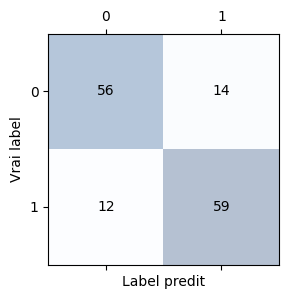

In [87]:
# matrice de confusion
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")


- Courbe ROC

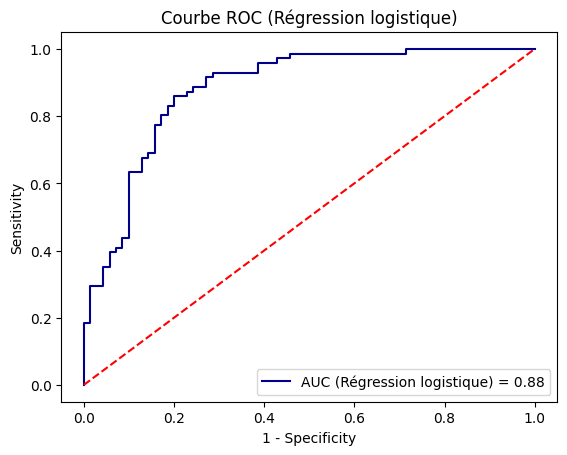

AUC (Régression logistique): 0.8822937625754527


In [88]:
# Courbe ROC pour régression logistique
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

plt.plot(log_reg_fpr, log_reg_tpr, color='darkblue', label=f'AUC (Régression logistique) = {log_reg_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Courbe ROC (Régression logistique)')
plt.legend(loc='lower right')
plt.show()
print(f'AUC (Régression logistique): {log_reg_auc}')

- Variables importantes pour le modèle de régression logistique

In [89]:
# Importance des variables pour la régression logistique
log_reg_coeff = log_reg.coef_[0]
log_reg_importance = pd.Series(log_reg_coeff, index=X.columns).sort_values(ascending=False)
print('Importance des variables (Régression logistique):')
print(log_reg_importance)

Importance des variables (Régression logistique):
credit_demande                          1.796530
salaire                                 0.734797
statut_matrimonial_celibataire          0.711361
anciennete_anc. de 4  a 6 ans           0.563852
anciennete_anc. de 1  a 4 ans           0.541350
tranche_epargne_pas d'epargne           0.508057
cumul_credit_moins de 40  debits        0.340908
tranche_epargne_plus de 100KF epargn    0.218018
tranche_age_de 40 a     50 ans          0.208903
tranche_age_de 23 a     40 ans          0.114481
profession_autre                        0.076429
statut_matrimonial_marie                0.032982
cumul_credit_de 40 a 100  debits        0.032529
profession_cadre                        0.006534
tranche_age_moins de    23 ans         -0.012878
tranche_epargne_moins de 10KF epargn   -0.023171
anciennete_anc. 1 an  ou moins         -0.056590
profession_employe                     -0.087006
statut_matrimonial_divorce             -0.140293
anciennete_anc. plu

#### Forêt aléatoire

In [90]:
from sklearn.ensemble import RandomForestClassifier
    
# Création d'une instance du modèle de régression linéaire
clas_rf=RandomForestClassifier()
# Entraînement du modèle sur les données d'entraînement
clas_rf.fit(X_train,y_train)

RandomForestClassifier()

- Sauvegarde du modèle : 1ère méthode

In [91]:
import joblib
joblib.dump(clas_rf,"model_clas_rf.pkl")

['model_clas_rf.pkl']

- Sauvegarde du modèle : 2 éme méthode

In [92]:
import pickle
with open("model_clas_rf.pkl", "wb") as file:
    pickle.dump(clas_rf, file)


- Prédiction

In [93]:
# Prédiction des valeurs sur les données d'entraînement
y_pred_train_rf = clas_rf.predict(X_train)

# Calcul du score accuracy  sur les données d'entraînement
print("Score accuracy  sur les données d'entraînement :", accuracy_score(y_train, y_pred_train_rf))

# Prédiction des valeurs sur les données de test
y_pred_test_rf = clas_rf.predict(X_test)

# Calcul du score accuracy  sur les données de test
print("Score accuracy  sur les données de test :", accuracy_score(y_test, y_pred_test_rf))


Score accuracy  sur les données d'entraînement : 1.0
Score accuracy  sur les données de test : 0.7801418439716312


In [94]:
# Prédiction des probabilités pour forêt aléatoire
rf_probs = clas_rf.predict_proba(X_test)[:, 1]

- Les scores

In [95]:
from sklearn.metrics import classification_report
target_names = ['Mauvais client', 'Bon client']
print(classification_report(y_test, y_pred_test,target_names=target_names))

                precision    recall  f1-score   support

Mauvais client       0.82      0.80      0.81        70
    Bon client       0.81      0.83      0.82        71

      accuracy                           0.82       141
     macro avg       0.82      0.82      0.82       141
  weighted avg       0.82      0.82      0.82       141



- Matrice de confusion

In [96]:
# Matrice de confusion avec les probabilités calculées
rf_pred = (rf_probs >= 0.5).astype(int)
rf_cm = confusion_matrix(y_test, rf_pred)
print('Matrice de confusion (Forêt aléatoire):')
print(rf_cm)

Matrice de confusion (Forêt aléatoire):
[[56 14]
 [16 55]]


Text(0, 0.5, 'Vrai label')

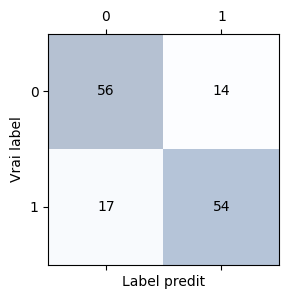

In [97]:
# matrice de confusion
confmat = confusion_matrix(y_true=y_test, y_pred= y_pred_test_rf)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")

- Courbe ROC 

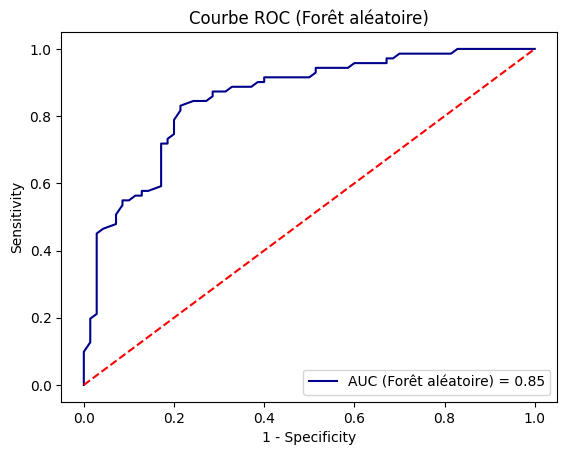

AUC (Forêt aléatoire): 0.8548289738430583


In [98]:
# Courbe ROC pour forêt aléatoire
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.plot(rf_fpr, rf_tpr, color='darkblue', label=f'AUC (Forêt aléatoire) = {rf_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Courbe ROC (Forêt aléatoire)')
plt.legend(loc='lower right')
plt.show()
print(f'AUC (Forêt aléatoire): {rf_auc}')

- Varibles importantes pour le modèle forêt aléatoire

In [99]:
# Importance des variables pour la forêt aléatoire
rf_importance = pd.Series(clas_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Importance des variables (Forêt aléatoire):')
print(rf_importance)

Importance des variables (Forêt aléatoire):
credit_demande                          0.336478
salaire                                 0.191170
anciennete_anc. 1 an  ou moins          0.045456
cumul_credit_plus de 100  debits        0.043989
anciennete_anc. plus   12 ans           0.031643
cumul_credit_moins de 40  debits        0.027105
profession_autre                        0.024721
statut_matrimonial_divorce              0.024106
tranche_epargne_pas d'epargne           0.023110
statut_matrimonial_marie                0.022363
anciennete_anc. de 6  a 12 ans          0.021970
statut_matrimonial_celibataire          0.021299
tranche_age_de 23 a     40 ans          0.020961
profession_employe                      0.019923
cumul_credit_de 40 a 100  debits        0.018876
anciennete_anc. de 1  a 4 ans           0.017596
anciennete_anc. de 4  a 6 ans           0.016568
tranche_age_de 40 a     50 ans          0.015640
tranche_epargne_moins de 10KF epargn    0.015435
tranche_age_moins de    2

### 5. Optimisation des performances: Réglage des hyperparamètres

In [100]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Création d'une liste de dictionnaires pour stocker les résultats
results = []

# Modèles à tester
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=100)
}

# Boucle sur chaque modèle
for name, model in models.items():
    # Définir les paramètres de la recherche par grille pour les modèles qui en ont besoin
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    # Utilisation de la recherche par grille si des hyperparamètres doivent être ajustés
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_

    # Entraînement du modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédiction sur les données d'entraînement et de test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calcul les scores accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Ajout des résultats au tableau
    results.append({
        'Modèle': name,
        'Score accuracy (train)': accuracy_train,
        'Score accuracy (test)': accuracy_test
    })

# Création un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Affichage de DataFrame des scores
print(results_df)


                Modèle  Score accuracy (train)  Score accuracy (test)
0  Logistic Regression                0.819572               0.815603
1        Random Forest                1.000000               0.794326


## Autre manière de faire

#### Régression Logistique

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Créer une instance du modèle de régression linéaire
reg_log = LogisticRegression()

# Créer un pipeline avec StandardScaler et LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', reg_log)
])

# Définir les valeurs des hyperparamètres à tester
param_grid = {'regression__fit_intercept': [True, False]}

# Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_test = grid_search.predict(X_test)

# Calculer le score R2 sur les données de test
print("Score accuracy sur les données de test :", accuracy_score(y_test, y_pred_test))


Meilleurs hyperparamètres : {'regression__fit_intercept': False}
Score accuracy sur les données de test : 0.8156028368794326


#### Forêt aléatoire

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Créer une instance du modèle de forêt aléatoire
rf = RandomForestClassifier()

# Définir les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_test = grid_search.predict(X_test)

# Calculer le score R2 sur les données de test
print("Score R2 sur les données de test :", accuracy_score(y_test, y_pred_test))


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Score R2 sur les données de test : 0.8014184397163121
